In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 64
training_epochs = 50
nb_classes = 16
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB_CNN.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, :12]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data[0])

(160000, 12) (160000, 4)
[-0.5181557   0.51293826  0.5053995   0.97950834 -0.08778331  0.99633783
 -2.837769   -0.04458653 -0.1449329   0.46245688  1.0533752   1.0021063 ]


In [7]:
scaler = StandardScaler() 
scaler.fit(x_data)
x_data_scaled = scaler.transform(x_data)
print(x_data_scaled)
print(x_data_scaled.shape)

[[-0.32338127  0.72548646  0.71280175 ...  0.29025424  1.48973
   1.4155737 ]
 [-1.5829918   0.48884267  0.72490543 ...  1.957233   -0.7861564
  -1.1469651 ]
 [-1.2723964   0.3250471   1.3662757  ... -0.29594502 -0.2405829
   0.3119823 ]
 ...
 [ 0.92286986 -0.584231   -0.3887325  ... -0.413759    2.1745775
  -1.0715169 ]
 [ 2.5194762  -0.13025801  2.588134   ...  1.4144659  -0.15671928
  -0.80296034]
 [ 1.8832055   0.764022    0.7754476  ... -0.483084   -1.1993619
  -0.0884664 ]]
(160000, 12)


In [11]:
# x_Data change 1D to 2D
x_data_2D = np.zeros(shape=(x_data.shape[0],3,4))
for num0 in range(0, x_data.shape[0]):
    for num1 in range(0, 4):
        temp = 3*num1
        temp1 = x_data_scaled[num0, 0+temp:3+temp].reshape(3)
        x_data_2D[num0, :, num1] = temp1
print(x_data_2D)

[[[-0.32338127  0.60932255 -1.76202369  0.29025424]
  [ 0.72548646 -0.12495112 -0.06232002  1.48973   ]
  [ 0.71280175  1.40889192 -0.21052633  1.41557372]]

 [[-1.58299184 -2.29368782 -0.25803098  1.95723295]
  [ 0.48884267  0.29362485  1.03390896 -0.78615642]
  [ 0.72490543  0.88869977 -0.30911699 -1.14696515]]

 [[-1.27239645  0.33080101  0.72089398 -0.29594502]
  [ 0.32504711 -0.10301987 -0.75323611 -0.2405829 ]
  [ 1.36627567  0.31999919 -1.71884835  0.3119823 ]]

 ...

 [[ 0.92286986  0.02320763  0.60519087 -0.41375899]
  [-0.58423102  1.46573877 -0.44491211  2.17457747]
  [-0.38873249 -0.13388166  1.27448559 -1.07151687]]

 [[ 2.51947618 -1.42971158 -0.94962323  1.4144659 ]
  [-0.13025801  0.7387405  -1.99636412 -0.15671928]
  [ 2.58813405 -0.15239479  0.3284094  -0.80296034]]

 [[ 1.88320553 -0.19591326  0.80598605 -0.48308399]
  [ 0.76402199  0.9853875  -0.63886559 -1.19936192]
  [ 0.77544761  0.74705708 -0.37385955 -0.0884664 ]]]


In [15]:
x_data_2D = x_data_2D.reshape(x_data.shape[0],3,4, 1)
print(x_data_2D.shape)

(160000, 3, 4, 1)


In [16]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [17]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(3,4, 1),
                                    padding = 'same', strides = (1,1), kernel_initializer='he_normal'))
tf.model.add(tf.keras.layers.BatchNormalization())
tf.model.add(tf.keras.layers.Activation('relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
#tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2),
                                    padding = 'same', strides = (1,1), kernel_initializer='he_normal'))
tf.model.add(tf.keras.layers.BatchNormalization())
tf.model.add(tf.keras.layers.Activation('relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
#tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3
tf.model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2),
                                    padding = 'same', strides = (1,1), kernel_initializer='he_normal'))
tf.model.add(tf.keras.layers.BatchNormalization())
tf.model.add(tf.keras.layers.Activation('relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
#tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='he_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 3, 4, 32)          160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 3, 4, 32)          128       
_________________________________________________________________
activation_11 (Activation)   (None, 3, 4, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 4, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 4, 64)          8256      
_________________________________________________________________
batch_normalization_12 (Batc (None, 3, 4, 64)          256       
_________________________________________________________________
activation_12 (Activation)   (None, 3, 4, 64)         

In [ ]:
history = tf.model.fit(x_data_2D, y_one_hot, validation_split=0.2, batch_size=batch_size, epochs=training_epochs)

Epoch 1/50
2000/2000 [==============================] - 8s 4ms/step - loss: 1.9173 - accuracy: 0.3176 - val_loss: 24.7616 - val_accuracy: 0.0201
Epoch 2/50
2000/2000 [==============================] - 7s 4ms/step - loss: 1.9177 - accuracy: 0.3162 - val_loss: 25.1584 - val_accuracy: 0.0238
Epoch 3/50
2000/2000 [==============================] - 7s 4ms/step - loss: 1.9147 - accuracy: 0.3183 - val_loss: 24.9454 - val_accuracy: 0.0240
Epoch 4/50
2000/2000 [==============================] - 7s 4ms/step - loss: 1.9153 - accuracy: 0.3167 - val_loss: 24.8256 - val_accuracy: 0.0209
Epoch 5/50
2000/2000 [==============================] - 7s 4ms/step - loss: 1.9126 - accuracy: 0.3175 - val_loss: 24.8517 - val_accuracy: 0.0232
Epoch 6/50
2000/2000 [==============================] - 7s 4ms/step - loss: 1.9125 - accuracy: 0.3192 - val_loss: 24.8358 - val_accuracy: 0.0227
Epoch 7/50
2000/2000 [==============================] - 7s 4ms/step - loss: 1.9125 - accuracy: 0.3176 - val_loss: 24.5244 - val_ac

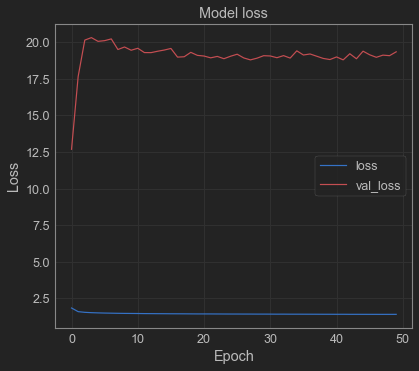

In [10]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

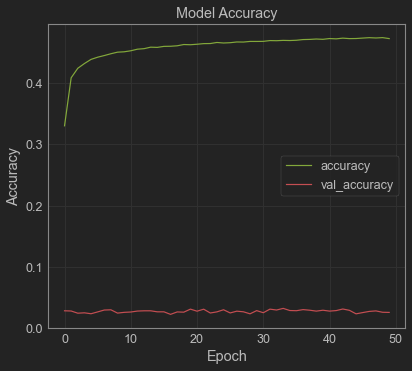

In [11]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_NoC_16_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:21]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(160000, 20) (160000, 4)


In [13]:
scaler = StandardScaler() 
scaler.fit(x_test_data)
x_test_data_scaled = scaler.transform(x_test_data)
#print(x_test_data_scaled)
print(x_test_data_scaled.shape)

(160000, 20)


In [14]:
x_test_data_2D = np.zeros(shape=(x_test_data.shape[0],x_test_data.shape[1],x_test_data.shape[1]))
print(x_test_data_2D.shape)
for num0 in range(0, x_test_data.shape[0]):
    for num1 in range(0, x_test_data.shape[1]):
        temp1 = x_test_data_scaled[num0].reshape(x_test_data.shape[1])
        temp2 = np.roll(temp1, num1)
        x_test_data_2D[num0, :, num1] = temp2
#print(x_test_data_2D)

(160000, 20, 20)


In [15]:
x_test_data_2D = x_test_data_2D.reshape(x_test_data.shape[0],x_test_data.shape[1],x_test_data.shape[1], 1)
print(x_test_data_2D.shape)

(160000, 20, 20, 1)


In [16]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [17]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
evaluation = tf.model.evaluate(x_test_data_2D, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

5000/5000 [==============================] - 10s 2ms/step - loss: 5.1091 - accuracy: 0.4068
loss:  5.1091227531433105
accuracy 0.4067875146865845


In [19]:
#pre_error_cnt = 0
predict_x = tf.model.predict(x_test_data_2D) 
pred = np.argmax(predict_x,axis=1)
#for p, y in zip(pred, y_test_bit.flatten()):
    #print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    #if p != int(y):
        #pre_error_cnt += 1
#print("Prediction Error Count : ", pre_error_cnt)

In [20]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 94914
Error Count: 143716


In [21]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.22455625
